Loading data...
Data loaded.
Training Teacher Model
Epoch: 20/200..  Training loss: 12801.27832..  Reg Proj: 0.00000..  Reg Latent: 0.82168..  Memory: 12793.06152..  Cost: 12801.27832.. 
Epoch: 40/200..  Training loss: 8107.70850..  Reg Proj: 0.00000..  Reg Latent: 1.10189..  Memory: 8096.68945..  Cost: 8107.70850.. 
Epoch: 60/200..  Training loss: 8803.84570..  Reg Proj: 0.00000..  Reg Latent: 1.60828..  Memory: 8787.76270..  Cost: 8803.84570.. 
Epoch: 80/200..  Training loss: 11069.12109..  Reg Proj: 0.00000..  Reg Latent: 1.22634..  Memory: 11056.85742..  Cost: 11069.12109.. 
Epoch: 100/200..  Training loss: 8791.94629..  Reg Proj: 0.00000..  Reg Latent: 0.18879..  Memory: 8790.05859..  Cost: 8791.94629.. 
Epoch: 120/200..  Training loss: 8982.84570..  Reg Proj: 0.00000..  Reg Latent: 0.13704..  Memory: 8981.47559..  Cost: 8982.84570.. 
Epoch: 140/200..  Training loss: 8557.55469..  Reg Proj: 0.00000..  Reg Latent: 0.56293..  Memory: 8551.92578..  Cost: 8557.55469.. 
Epoch: 160/200.

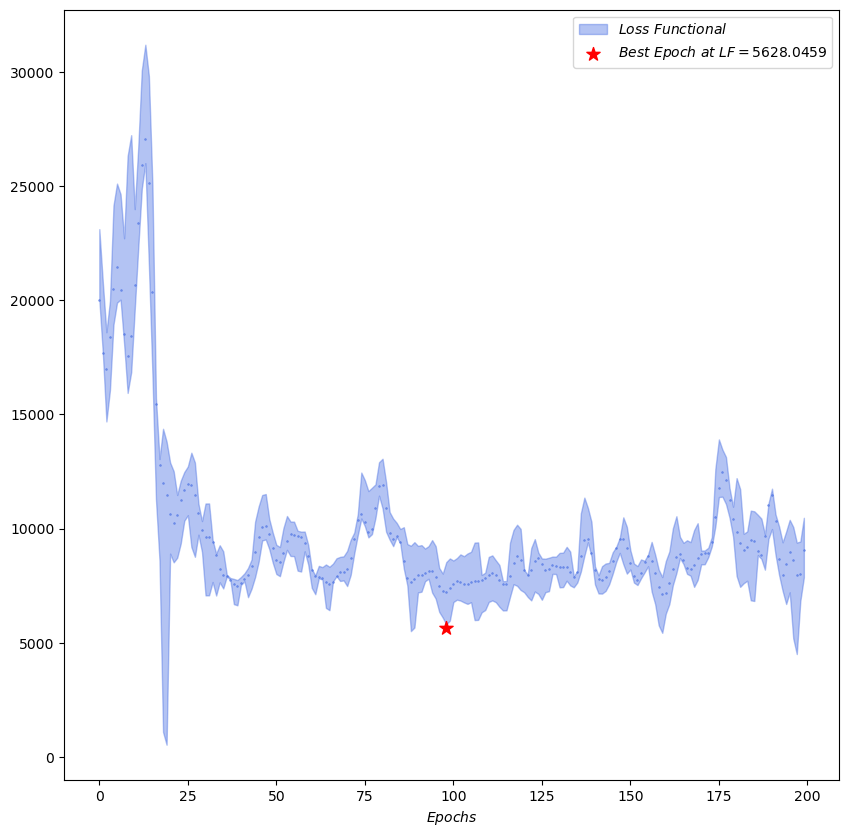

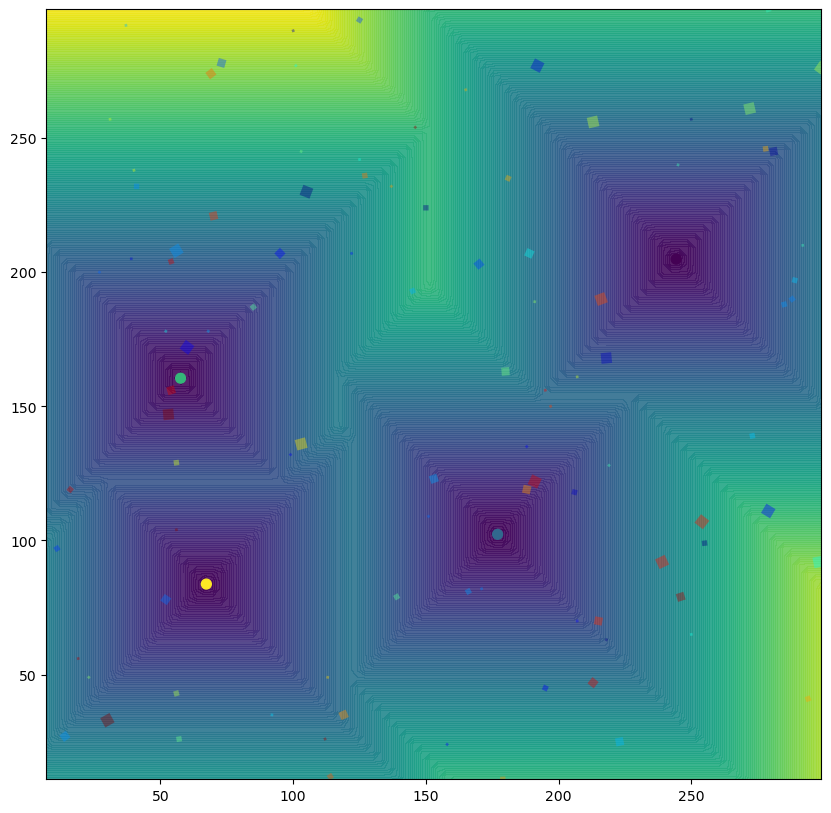

Processing...
flag is 5735
m is 4266
i is 10000


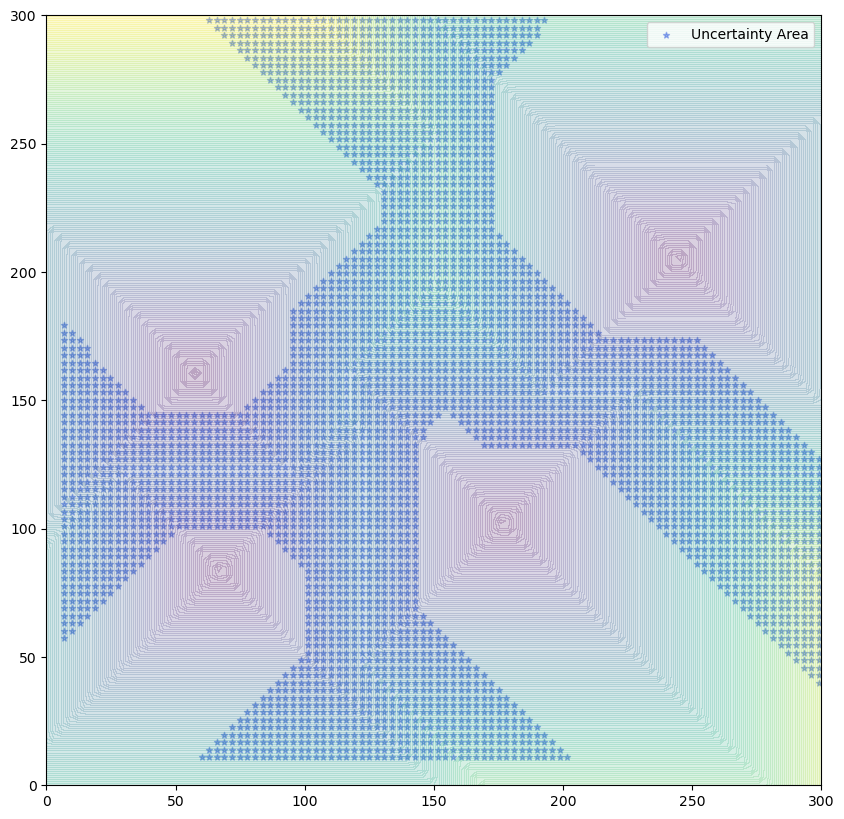

Labeled 0/4266 points.
Labeled 1000/4266 points.
Labeled 2000/4266 points.
Labeled 3000/4266 points.
Labeled 4000/4266 points.
Labeled all 4266/4266 points.


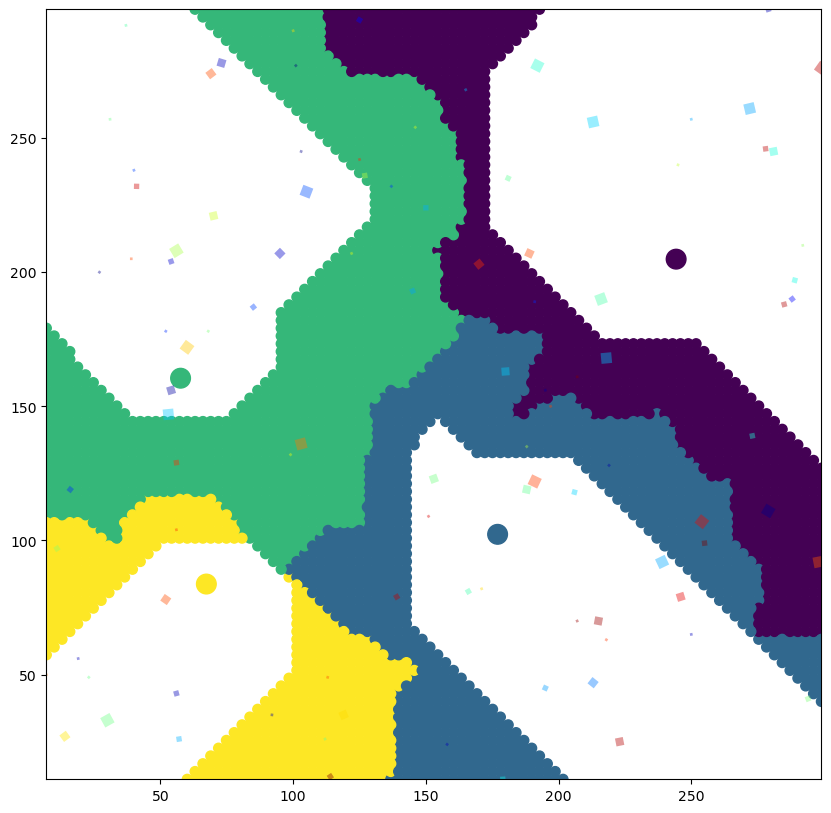

Training Student Model
Acc:  0.24331926863572434
Epoch:  0 Cost:  1990.4666748046875
Acc:  0.8942803563056727
Epoch:  2000 Cost:  33.60051727294922
Acc:  0.90014064697609
Epoch:  4000 Cost:  22.100400924682617
Acc:  0.9217065166432254
Epoch:  6000 Cost:  17.02344512939453
Acc:  0.943272386310361
Epoch:  8000 Cost:  13.229283332824707
Acc:  0.9810126582278481
Epoch:  10000 Cost:  11.56723690032959
Acc:  0.9753867791842475
Epoch:  12000 Cost:  9.492093086242676
Acc:  0.9582747304266291
Epoch:  14000 Cost:  9.44485855102539
Acc:  0.9789029535864979
Epoch:  16000 Cost:  7.242133617401123
Acc:  0.9362400375058603
Epoch:  18000 Cost:  12.678523063659668
Acc:  0.9852320675105485
Epoch:  20000 Cost:  5.720943450927734
Acc:  0.9721050164088139
Epoch:  22000 Cost:  6.412642478942871
Acc:  0.9817158931082982
Epoch:  24000 Cost:  5.353962421417236
Acc:  0.9934364744491326
Epoch:  26000 Cost:  4.533163070678711
Acc:  0.9943741209563994
Epoch:  28000 Cost:  4.27370023727417


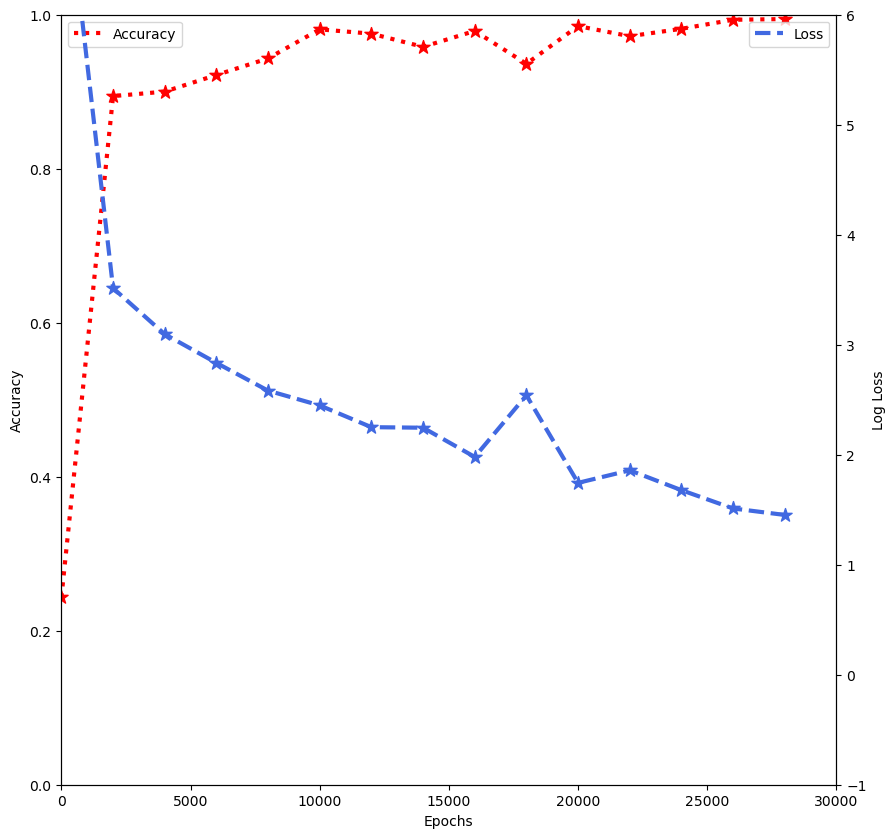

In [1]:
import torch
from src.quadtree import QuadTree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data, _ = loadData(100)

learning_rate = 1e-2
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200,
    "times": 10,
    "train_data": torch.from_numpy(data).float().to(device),
    "alpha": 5,
    "beta": 10
}
un_args = {
    "N": 100,
    "M": 10000 - 1,
    "epsilon": 0.15
}
student_args = {
    "optimizer_lr": 1e-3,
    "epochs": 30000,
}

quadtree = QuadTree(10, data, teacher_args, un_args, student_args)
quadtree.root.create_student(teacher_args, un_args, student_args, plot=True)